$\begin{align} \tag*{styczeń 2021} \end{align}$

# $$\text{Dynamika rzutu w koszykówce}$$
$$\text{Mikołaj Langner, Marcin Miśkiewicz}$$
$$\scriptstyle \text{Wydział Matematyki Politechniki Wrocławskiej}$$

## $\text{Abstrakt}$

___

<span style='font-size:larger;font-family:"Didot"'>
Przedmiotem niniejszego projektu jest analiza trajektorii lotu piłki do koszykówki w sytuacji oddania rzutu osobistego. Przeprowadzając symulacje numeryczne znajdziemy zbiór kątów wyrzutu i prędkości początkowych piłki dla których, w sformułowanym modelu, próba kończy się trafieniem do kosza.

## $\text{1. Wprowadzenie}$ 

___

<span style='font-size:larger;font-family:"Didot"'>    
W meczu ligi NBA na jedną drużynę przypada często ponad 20 okazji zdobycia punktu z rzutu osobistego. [[1]](#references) Nic więc dziwnego, że trenerzy oraz całe sztaby analityków przywiązują szczególną wagę do tego na pozór nieskomplikowanego elementu gry. Współcześnie, profesjonalni koszykarze mogą liczyć na indywidualne analizy opracowane tak, aby zmaksymalizować skuteczność rzutu. Możemy m.in zaobserwować różnice w kącie wyrzutu piłki wśród różnych zawodników. Dla przykładu, mający 1.91 m wzrostu Stephen Curry wyrzuca piłkę średnio pod kątem 56.4 stopni (ze skutecznością na poziomie 89.8%), natomiast mający 2.11 m wzrostu Tim Duncan, za czasów gry w lidze, wyrzucał piłkę średnio pod kątem 45.2 stopni (ze skutecznością na poziomie 73.3%). [[2]](#references) Kluczową rolę odgrywa również siła rzutu, a co za tym idzie, prędkość piłki w chwili opuszczenia dłoni gracza.

<span style='font-size:larger;font-family:"Didot"'>    
Wprowadzając układ współrzędnych $x, y$, gdzie $x$ jest osią równoległą do dłuższego boku boiska, zaś $y$ jest wysokością [[Rysunek 1.]](#figure1), składowe wektora prędkości początkowonej, wyrzuconej piłki możemy wyrazić poprzez

$$\begin{cases}
\dot{x} = v_0\cos{\theta_0} \\
\dot{y} = v_0\sin{\theta_0} \end{cases}$$

<span style='font-size:larger;font-family:"Didot"'>
Gdzie $v_0$ jest wartością prędkości początkowej, a $\theta_0$ kątem wyrzutu. W dalszej części pracy rozpatrzymy różne modele opisujące tor lotu piłki i przeprowadzając konkretne symulacje, znajdziemy te wartości $v_0, \theta_0$,  dla których rzut kończy się trafieniem do kosza.
    
Na potrzeby dalszych rozważań zdefiniujmy potrzebne oznaczenia i ustalmy wartości wykorzystywanych stałych. Z racji tego, że mówimy o najpopularniejszej lidze świata - NBA, parametry takie jak konkretne odległości lub wymiary kosza i piłki, odpowiadają tym ustandaryzowanym w National Basketball Association.

___
### $\text{1.1 Oznaczenia stałych}$ 

___


$\begin{align}
&\text{masa piłki: } && m = 0.6234 \; \; kg \\
&\text{średnica piłki: } && D = 0.24 \; m \\
&\text{promień piłki: } && R = 0.12 \; m \\
&\text{objętość piłki: } && V = 0.007 \; m^3\\
&\text{pole przekroju poprzecznego* piłki:} && A = 0.18 \; m^2 \\
&\text{moment bezwładności piłki: } && I = \frac{2}{3}mR^2 = 0.006 \; kg \cdot m^2 \\
&\text{przyspieszenie grawitacyjne: } && g = 9.81 \; \tfrac{m}{s^2} \\
&\text{gęstość powietrza: } && \rho = 1.225 \; \tfrac{kg}{m^3} \\
&\text{współczynnik Magnusa dla piłki}^{1}: && C_M = 0.25 \; \tfrac{rad}{s} \\
&\text{współczynnik oporu powietrza dla piłki}^{2}: && C_D = 0.24 \\
&\text{współczynnik sprężystości piłki: }^{3} && k = 45000 \; \tfrac{N}{m} \\
&\text{współczynnik tłumienia w kontakcie z tablicą: }^{4} && c = 24 \; \tfrac{Ns}{m} \\
&\text{współczynnik tarcia piłki w kontakcie z tablicą: }^{5} && \mu_{\operatorname{board}} = 0.6 \\
&\text{współczynnik tarcia piłki w kontakcie z obręczą: }^{6} && \mu_{\operatorname{rim}} = 0.5 \\
&\text{promień przekroju poprzecznego obręczy: } && R_{\operatorname{rim}} = 0.009 \; m \\
\end{align}$

$ $

$\text{Stałe pomocniczne: }$

$\begin{align} \\
& B =  \rho V g = 0.0784\\
& b = \tfrac{1}{2}C_D \rho A = 0.026 \\
& p = C_M \rho D^3 = 0.00381 \\
\end{align}$

$\scriptsize \left(^{*}\right) \; - \text{ przekrój - koło wielkie sfery, } \;$
$\scriptsize (1) \;- \text{ współczynnik wyznaczony w }$ [[3]](#references),
$\scriptsize \; (2) \;- \text{ współczynnik wyznaczony w }$ [[4]](#references),
$\scriptsize \; (3, 4, 5, 6) \;- \text{ współczynniki wyznaczone w }$ [[5]](#references),

___
### $\text{1.2 Oznaczenia odległości i wymiarów kosza}$ 

___

<a id='figure1'></a>
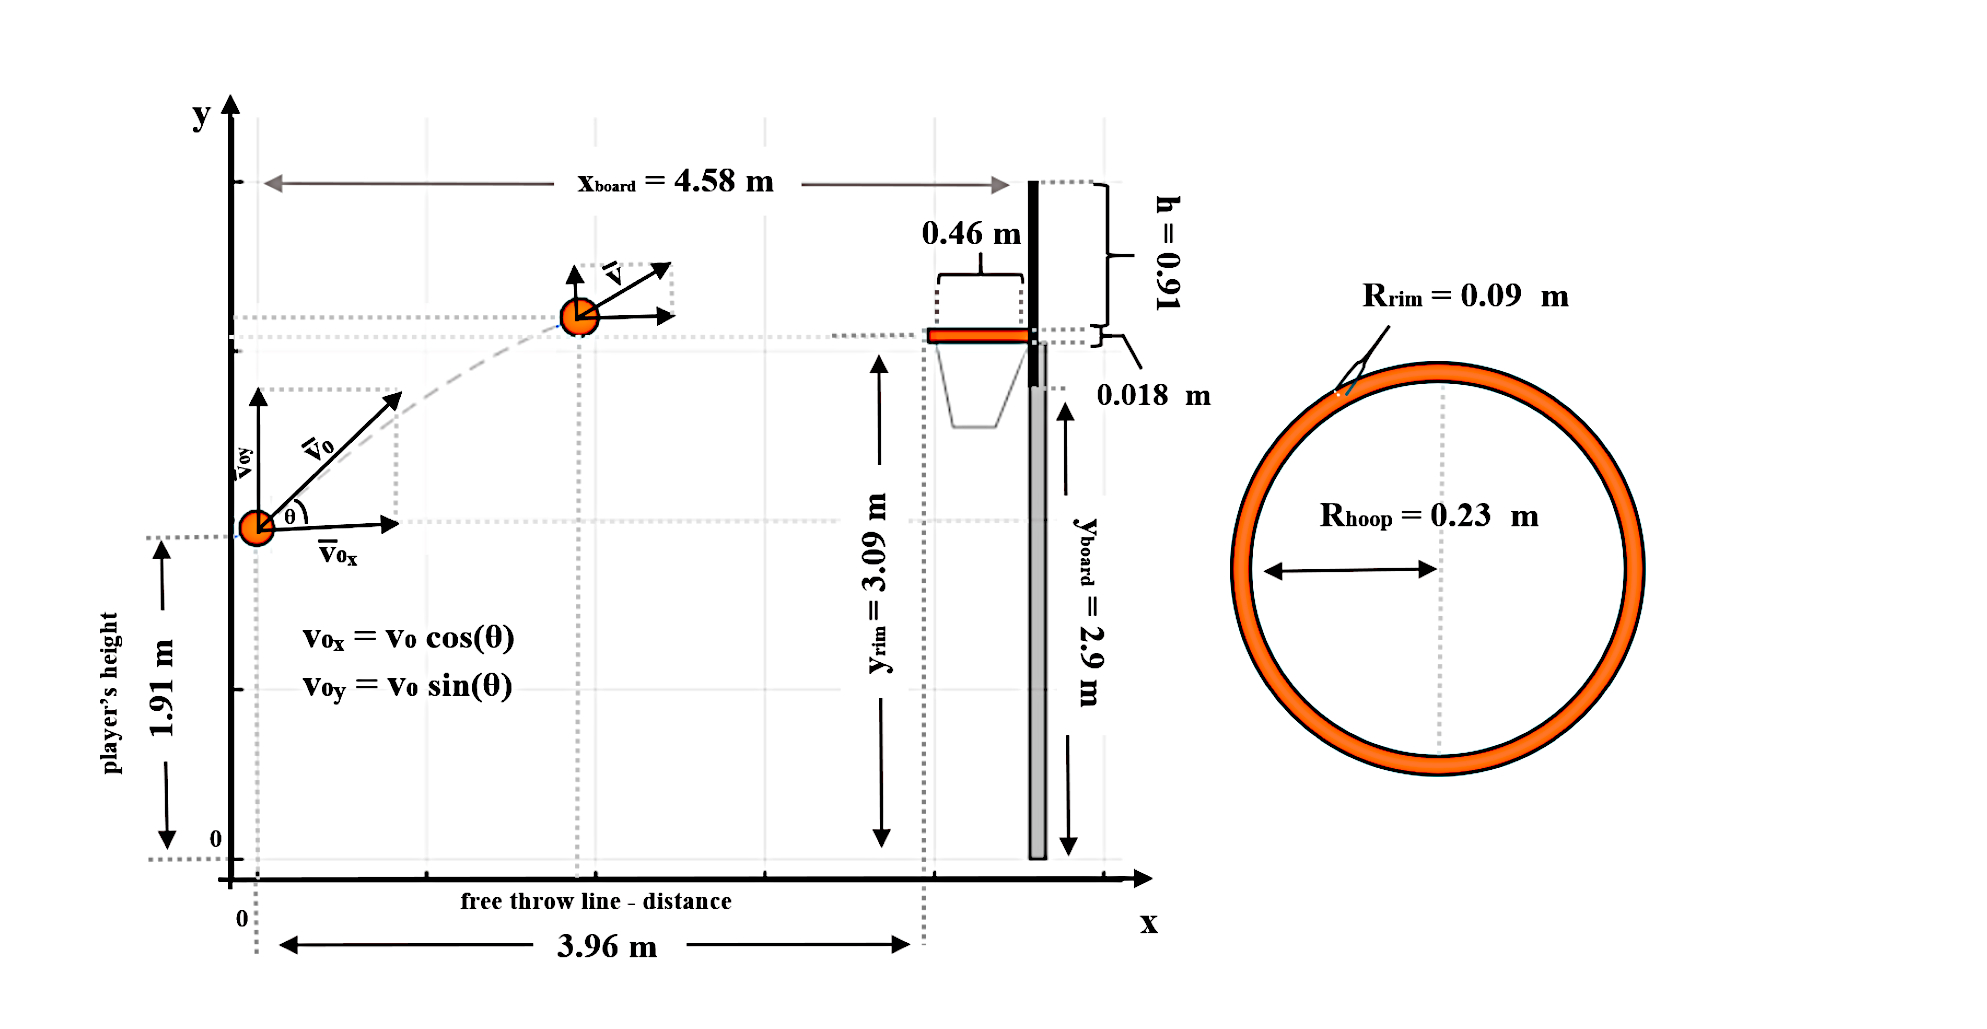

$$\text{Rysunek 1.}$$

In [1]:
m = 0.6234
R = 0.12
g = 9.81
μ_board = 0.6
μ_rim = 0.5
k = 45e3
c = 24
I = 2/3 * m * R^2
B = 0.0784
b = 0.026
p = 0.00381;

In [2]:
h₀ = 1.91
free_throw_line_x = 3.96
y_rim = 3.09
R_rim = 0.009
R_hoop = 0.23
x_rim_front = free_throw_line_x + R_rim
x_rim_back = x_rim_front + 2(R_hoop + R_rim)
y_board = 2.9
h = 0.91
x_board = x_rim_back + R_rim;

## $\text{2. Sformułowanie problemu}$ 

___

<span style='font-size:larger;font-family:"Didot"'>
Rozpatrujemy wykonanie rzutu osobistego przez zawodnika mającego 1.91 m wzrostu (czyli dokładnie tyle, ile ma Stephen Curry). Koszykarz stoi w odległości 3.96 m od krawędzi obręczy. Rzut następuje w momencie nadania piłce prędkości początkowej $v_0$ oraz prędkości kątowej $\omega$.
    
Ogólne założenia:    
* piłka jest jednorodną sferą o promieniu $R = 0.12 \, m$
* gracz rzuca prosto, to znaczy piłka porusza się jedynie w płaszczyźnie $x-y,$
* kierunek prędkości kątowej $\omega$ jest zawsze prostopadły do płaszczyzny $x -y,$
* gracz wyrzuca piłkę z rotacją wsteczną, czyli $\vec{\omega}=\omega\hat{k},$ gdzie $\omega>0.$

## $\text{3. Model}$ 

___

<span style='font-size:larger;font-family:"Didot"'>

### $\text{3.1 Pierwszy model — siła ciężkości i opór powietrza}$ 

___

<span style='font-size:larger;font-family:"Didot"'>
    
Początkowo rozpatrzymy jedynie dwie siły działające na piłkę podczas jej lotu — siłę ciężkości oraz siłę oporu powietrza. Skorzystamy z modelu zaproponowanego w [[6]](#references). Siła grawitacji, dana wzorem
    
$$ F = -mg\hat{y} $$
    
działa na piłkę jedynie w kierunku prostopadłym do podłoża. Siła oporu powietrza przyjmuje postać
    
$$ F_o = -k_o\overline{v} = -3\pi \mu D \overline{v} = -3\pi \mu D(\dot{x}\hat{x} + \dot{y}\hat{y}) $$
    
gdzie $\overline{v}$ jest wektorem prędkości piłki, $\mu = 18.1 \cdot 10^{-6} \; \tfrac{N m}{s}$ oznacza lepkość dynamiczną powietrza w temperaturze 20°C i przy ciśnieniu 1013 hPa, a $D$ oznacza średnicę piłki. Korzystając z II zasady dynamiki Newtona, możemy zapisać równania ruchu piłki
    
    
$$\begin{cases} m\ddot{x} = -k_o\dot{x} \\ m\ddot{y} = -mg - k_o\dot{y}\end{cases}$$
    
    
Zauważmy, że oba równania możemy rozwiązać analitycznie poprzez rozdzielenie zmiennych. Stosując podstawowe całkowanie oraz zakładając że $\; x(0) = 0, \; y(0) = 0, \; \dot{x}(0) = v_0\cos{\theta_0}, \; \dot{y}(0) = v_0\sin{\theta_0}$, otrzymujemy
    
$$\begin{cases} x(t) = \tfrac{m}{k_o}v_{0}\cos{\theta_0}\left(1 - e^{-\tfrac{k_o}{m}t}\right)
\\ y(t) = -\tfrac{mg}{k_o}t - \tfrac{m}{k_o}\left(v_0\sin{\theta_0} + \tfrac{mg}{k_o} \right)e^{-\tfrac{k_o}{m}t} + \tfrac{m}{k}\left(v_0\sin{\theta_0} + \tfrac{mg}{k_o} \right) 
\end{cases}$$
    

  

<span style='font-size:larger;font-family:"Didot"'>    
Przyjrzyjmy się portretowi fazowemu przestrzeni $\, \dot{x} - \dot{y} \,$ dla powyższego modelu

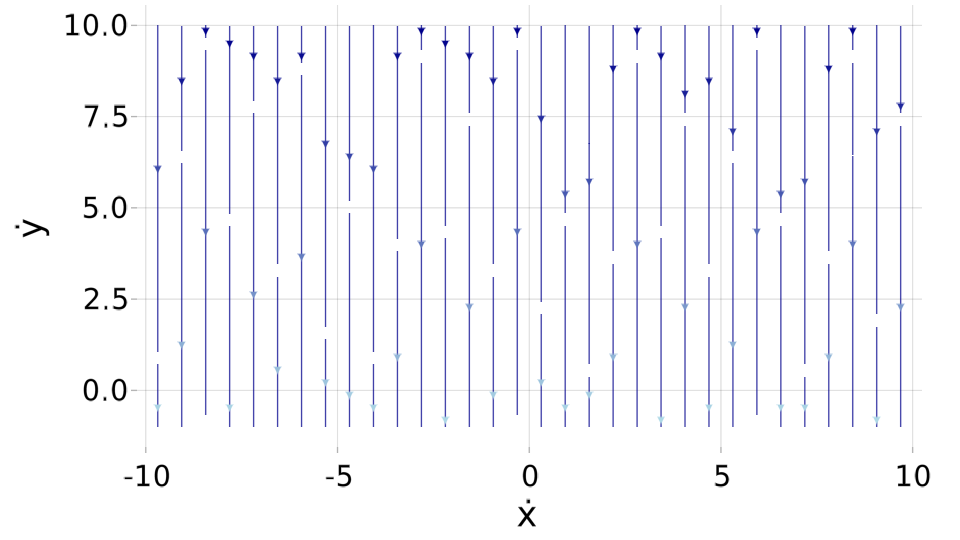

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [28]:
using GLMakie, AbstractPlotting
AbstractPlotting.inline!(true)

kₒ = 18.1 * 10^(-6) * 3 * π * 0.24
phase1(x, y) = Point2f0(-kₒ*x, -m*g - kₒ*y)
s1 = Scene()
streamplot!(s1, phase1, -10..10, -1..10, colormap = :blues, arrow_size=0.2)
AbstractPlotting.xlabel!(s1, "ẋ")
AbstractPlotting.ylabel!(s1, "ẏ")
s1

___

<span style='font-size:larger;font-family:"Didot"'>    
Możemy zauważyć, że prędkość piłki wzdłuż osi $\, x \,$ niemalże nie ulega zmianie. Zatem w tym przypadku wpływ siły oporu, na ruch piłki w poziomie, jest nikły. Przypuszczamy, że wykorzystana postać tej siły nie sprawdza się w modelowaniu obiektów poruszających się z tak dużymi prędkościami, dlatego w kolejnym modelu rozpatrzymy postać siły oporu, której wartość jest proporcjonalna do kwadratu prędkości piłki.

___

---
### $\text{3.2 Drugi model — siła wyporu i siła Magnusa}$ 

___

<span style='font-size:larger;font-family:"Didot"'>

<span style='font-size:larger;font-family:"Didot"'>
    
Opierając się na modelu zaproponowanym w [[7]](#references), załóżmy teraz, że siła oporu powietrza jest proporcjonalna do kwadratu prędkości $\vec{v}=\left\lVert \vec{v}\right\rVert\hat{v}=\dot{x}\hat{\imath}+\dot{y}\hat{\jmath}$. Wtedy siła ciężkości i siła oporu powietrza wyrażają się odpowiednio następującymi równaniami
    
$$\vec{F_g}=-mg\hat{\jmath},$$
$$\vec{F_o}=-C_D\rho A\left\lVert \vec{v}\right\rVert^2\hat{v}=-b\left\lVert \vec{v}\right\rVert\vec{v}=-b\sqrt{\dot{x}^2+\dot{y}^2}\left(\dot{x}\hat{\imath}+\dot{y}\hat{\jmath}\right).$$

<span style='font-size:larger;font-family:"Didot"'>
Z prawa Archimedesa możemy łatwo napisać kolejne równanie na siłę wyporu
$ $
    
$$\vec{F_w}=\rho Vg\hat{\jmath}=B\hat{\jmath}.$$

<span style='font-size:larger;font-family:"Didot"'>

Ostatnią rozważaną przez nas siłą jest siła Magnusa. Załóżmy, że piłka obraca się wyłącznie w płaszczyźnie $XY$. Siła Magnusa jest wynikiem iloczynu wektorowego $\vec{\omega}\times\vec{v},$ gdzie $\vec{\omega}=\lVert\vec{\omega}\rVert\hat{k}$ jest wektorem prędkości kątowej. Inaczej, siła Magnusa powoduje dodatkowy ruch, wynikający z prędkości liniowej i kątowej. Siła Magnusa wyraża się wzorem
    
$$\vec{F_M}=C_M\rho D^3\,\vec{\omega}\times\vec{v}=c\,\vec{\omega}\times\vec{v}=c\omega\left(-\dot{y}\hat{\imath}+\dot{x}\hat{\jmath}\right).$$

<span style='font-size:larger;font-family:"Didot"'>
Korzystając teraz z równań Newtona możemy zapisać
    
$ $ 
$$m\left(\ddot{x}\hat{\imath}+\ddot{y}\hat{\jmath}\right)=\left(-b\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}-p\dot{y}\omega\right)\hat{\imath}+\left(-mg-b\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}+B+p\dot{x}\omega\right)\hat{\jmath}$$
    
lub równoważnie jako układ równań różniczkowych
    
$$\begin{cases}
m\ddot{x}&=-b\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}-p\dot{y}\omega,\\
m\ddot{y}&=-mg-b\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}+B+p\dot{x}\omega.
\end{cases}$$

In [89]:
F_x(ẋ::Real, ẏ::Real, ω::Real)::Real = -b * ẋ * sqrt(ẋ^2 + ẏ^2) - p * ẏ * ω

F_x (generic function with 1 method)

In [88]:
F_y(ẋ::Real, ẏ::Real, ω::Real)::Real = -m * g - b * ẏ * sqrt(ẋ^2 + ẏ^2) + B + p * ẋ * ω

F_y (generic function with 1 method)

In [90]:
function F(t::Real, u::AbstractArray)::AbstractArray
    x, ẋ, y, ẏ, ω = u
    return [ẋ,
            F_x(ẋ, ẏ, ω) / m,
            ẏ,
            F_y(ẋ, ẏ, ω) / m,
            0]
end

F (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>    
Zanim rozwiążemy numerycznie powyższy, nieliniowy układ równań, przyjrzyjmy się portretowi fazowemu przestrzeni $\dot{x} - \dot{y}$

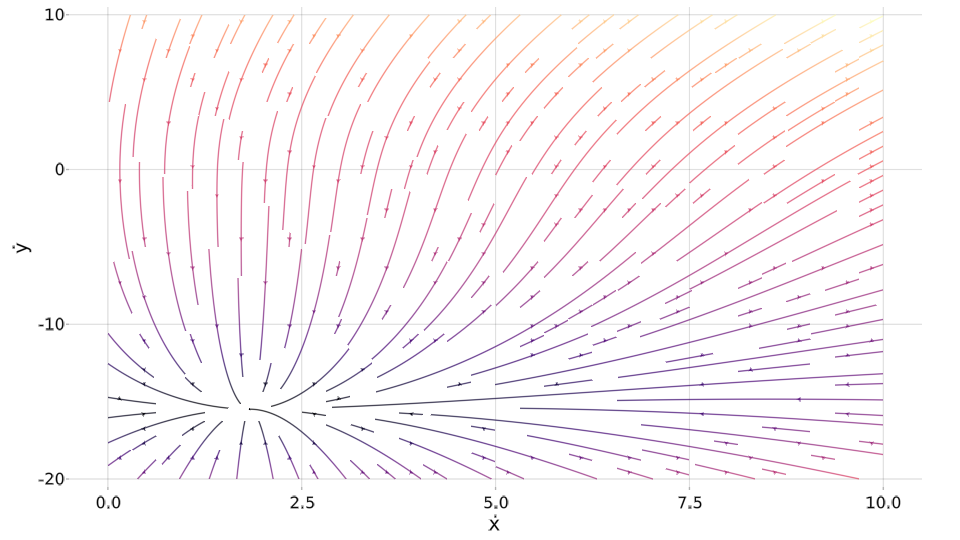

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [71]:
using GLMakie, AbstractPlotting
AbstractPlotting.inline!(true)

ω = 4π
phase2(x, y) = Point2f0((-b*x*sqrt(x^2 + y^2) - p*y*ω) / m, -g - (b*y*sqrt(x^2 + y^2) + B + p*ω*x) / m)
s2 = Scene(xlabel="s2")
streamplot!(s2, phase2, 0..10, -20..10, colormap = :magma, arrow_size=0.2)
AbstractPlotting.xlabel!(s2, "ẋ")
AbstractPlotting.ylabel!(s2, "ẏ")
s2

<span style='font-size:larger;font-family:"Didot"'>    
Analizując powyższą przestrzeń, możemy wyciągnąć wniosek, że im większa jest pozioma prędkość piłki w chwili wyrzutu, tym szybciej ona maleje. Wyraźnie zatem widać wpływ siły oporu na prędkość piłki.

<span style='font-size:larger;font-family:"Didot"'>   
Widzimy dodatkowo, że w okolicach $x\approx2, y\approx-15$ występuje punkt krytyczny. Postaramy się go oszacować i przeanalizować. Do tego będziemy potrzebowali macierzy Jacobiego 
    $$\begin{bmatrix}
    \frac{\partial F_x}{\partial x} & \frac{\partial F_x}{\partial y}\\
    \frac{\partial F_y}{\partial x} & \frac{\partial F_x}{\partial y}
    \end{bmatrix} = \begin{bmatrix}
    \frac{-b}{m}\left(\sqrt{\dot{x}^2+\dot{y}^2}+\frac{\dot{x}^2}{\sqrt{\dot{x}^2+\dot{y}^2}}\right) & 
    \frac{1}{m}\left(\frac{-b\dot{x}\dot{y}}{\sqrt{\dot{x}^2+\dot{y}^2}}-p\omega\right) \\
    \frac{1}{m}\left(\frac{-b\dot{x}\dot{y}}{m\sqrt{\dot{x}^2+\dot{y}^2}}+p\omega\right) &
    \frac{-b}{m}\left(\sqrt{\dot{x}^2+\dot{y}^2}+\frac{\dot{x}^2}{\sqrt{\dot{x}^2+\dot{y}^2}}\right)
    \end{bmatrix}$$

In [72]:
function jacobian(x)
    J = [NaN NaN; NaN NaN]
    J[1, 1] = -b / m * (sqrt(x[1]^2 + x[2]^2) + x[1]^2 / sqrt(x[1]^2 + x[2]^2))
    J[1, 2] = (-b * x[1] * x[2] / sqrt(x[1]^2 + x[2]^2) - p * ω₀) / m
    J[2, 1] = (-b * x[1] * x[2] / sqrt(x[1]^2 + x[2]^2) + p * ω₀) / m
    J[2, 2] = -b / m * (sqrt(x[1]^2 + x[2]^2) + x[2]^2 / sqrt(x[1]^2 + x[2]^2))
    return J
end

jacobian (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>  
Przy pomocy modułu do rozwiązywania układów równań nieliniowych, znajdziemy punkt krytyczny przy $\omega=4\pi$.

In [87]:
using NLsolve

function solve_system()
    ω₀ = 4π
    
    function f!(F, x)
        F[1] = F_x(x[1], x[2], ω₀) / m
        F[2] = F_y(x[1], x[2], ω₀) / m
    end

    function j!(J, x)
        J[1, 1] = -b / m * (sqrt(x[1]^2 + x[2]^2) + x[1]^2 / sqrt(x[1]^2 + x[2]^2))
        J[1, 2] = (-b * x[2] / sqrt(x[1]^2 + x[2]^2) - p * ω₀) / m
        J[2, 1] = (-b * x[1] * x[2] / sqrt(x[1]^2 + x[2]^2) + p * ω₀) / m
        J[2, 2] = -b * (sqrt(x[1]^2 + x[2]^2) + x[2]^2 / sqrt(x[1]^2 + x[2]^2))
    end

    return nlsolve(f!, j!, [0.1; -0.1]).zero
end

solve_system (generic function with 1 method)

In [74]:
solve_system()

2-element Array{Float64,1}:
   1.8280596406142946
 -15.072064807955853 

<span style='font-size:larger;font-family:"Didot"'>
Widzimy, że w przybliżeniu nasz punkt krytyczny to $(x, y) \approx (1.828, -15.072).$ Teraz możemy znaleźć wartości własne macierzy Jacobiego dla tego punktu, żeby przeanalizować jego stabilność.

In [75]:
using LinearAlgebra
X = solve_system()
eigen(jacobian(X))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
 -1.2569715128098136
 -0.6426701730718181
eigenvectors:
2×2 Array{Float64,2}:
 0.00181169  0.97057 
 0.999998    0.240818

<span style='font-size:larger;font-family:"Didot"'>  
Jako, że wartości własne macierzy Jacobiego są rzeczywiste i ujemne, to nasz punkt jest węzłem stabilnym. To znaczy, że dla odpowiednio długo trwającego rzutu, prędkość w pewnym momencie pozostanie stała, czyli piłka będzie się poruszała wtedy ruchem jednostajnym, prostoliniowym.

___

## $\text{4. Metody numeryczne}$ 

___

<span style='font-size:larger;font-family:"Didot"'>


### $\text{4.1 Algorytm Rungego-Kutty}$ 

___

<span style='font-size:larger;font-family:"Didot"'>

<span style='font-size:larger;font-family:"Didot"'>
W dalszych części pracy większość równań różniczkowych będziemy rozwiązywali w sposób numeryczny. Przyjrzymy się zatem wykorzystywanemu algorytmowi. Zastosujemy metodę Rungego-Kutty 4. rzędu. Nasz powyższy układ równań różniczkowych rzędu drugiego można łatwo sprowadzić do układu równań rzędu pierwszego. Niech $x_1=x\;y_1=y$. Wtedy
    
$$\begin{cases}
\dot{x_1}&=x_2,\\
\dot{x_2}&=\frac{-bx_2\sqrt{x_2^2+y_2^2}-cy_2\omega}{m},\\
\dot{y_1}&=y_2,\\
\dot{y_2}&=\frac{-mg-by_2\sqrt{x_2^2+y_2^2}+B+cx_2\omega}{m}.
\end{cases}$$

<span style='font-size:larger;font-family:"Didot"'>
    
Algorytm Rungego-Kutty pozwoli nam na numeryczne wyliczenie poszczególnych składowych powyższego układu. Oznaczmy
    
$$\vec{u}'=\begin{bmatrix}\dot{x_1}\\\dot{x_2}\\\dot{y_1}\\\dot{y_2}\end{bmatrix}=\vec{f}\left(t, x_1,x_2,y_1,y_2\right)$$
    
Według algorytmu, przy danym warunku początkowym $\vec{u}(t_0)=\vec{u_0}$, będziemy wyliczać kolejne wartości w czasie zgodnie ze wzorem 
    
$$\vec{u_{n+1}}=\vec{u_n}+\Delta \vec{u_n}=\vec{u_n}+\frac{1}{6}\left(\vec{k_1}+2\,\vec{k_2}+2\,\vec{k_3}+\vec{k_4}\right),$$ gdzie
- $\vec{k_1}=h\vec{f}\left(t_n,\vec{u_n}\right),$
- $\vec{k_2}=h\vec{f}\left(t_n+\frac{h}{2},\vec{u_n}+\frac{\vec{k_1}}{2}\right),$
- $\vec{k_3}=h\vec{f}\left(t_n+\frac{h}{2},\vec{u_n}+\frac{\vec{k_2}}{2}\right),$
- $\vec{k_4}=h\vec{f}\left(t_n+h,\vec{u_n}+\vec{k_3}\right),$
- $h$ - długość kroku.

<span style='font-size:larger;font-family:"Didot"'>
    
Jako długość kroku $h$ będziemy dalej cały czas przyjmowali $1\operatorname{ms}$, taki krok pozwoli nam na dość dokładne oszacowanie rozwiązania oraz nie będzie zbyt obliczeniowo kosztowne.

In [8]:
function runge_kutta(f::Function, t::LinRange{Float64}, u₀::AbstractArray)::AbstractArray
    u = fill(NaN, (length(t), length(u₀)))
    u[1, :] = u₀
    h = (t.stop - t.start) / (t.len - 1)
    for n in 1:length(t)-1
        k₁ = h * f(t[n], u[n, :])
        k₂ = h * f(t[n] + h/2, u[n, :] + k₁/2)
        k₃ = h * f(t[n] + h/2, u[n, :] + k₂/2)
        k₄ = h * f(t[n] + h, u[n, :] + k₃)
        u[n + 1, :] = u[n, :] + (k₁ + 2k₂ + 2k₃ + k₄) / 6
    end
    return u
end

runge_kutta (generic function with 1 method)

## $\text{5. Kolizje}$ 

___

<span style='font-size:larger;font-family:"Didot"'>

### $\text{5.1 Założenia}$ 

___

<span style='font-size:larger;font-family:"Didot"'>

<span style='font-size:larger;font-family:"Didot"'>     
- $\text{Podczas zderzeń pomijamy poślizg.}$
- $\text{Obręcz jest sztywnym walcem.}$
- $\text{Pomijamy drgania obręczy i tablicy po odbiciu.}$

---
### $\text{5.2 Sprawdzanie kolizji}$ 

___

<span style='font-size:larger;font-family:"Didot"'>

<span style='font-size:larger;font-family:"Didot"'>
Zajmijmy się najpierw kolizjami z tablicą. Sam warunek jest stosunkowo prosty. Musimy jedynie sprawdzić, czy środek piłki znajduje się w prostokącie $\left[x_{\operatorname{board}}-R, x_{\operatorname{board}}\right]\times\left[y_{\operatorname{board}}, y_{\operatorname{board}}+h\right]$. 

In [9]:
backboard_collision(x::Real, y::Real)::Bool = x_board - R <= x <= x_board && y_board <= y <= y_board + h

backboard_collision (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>
Przyjmijmy teraz bez straty ogólności, że punkt $P=\left(x_{\operatorname{rim}}, y_{\operatorname{rim}}\right)$ jest środkiem obręczy (przedniej lub tylnej części), wtedy warunkiem na wystąpienie kolizji ma postać
    $$\sqrt{\left(x-x_{\operatorname{rim}}\right)^2+\left(y-y_{\operatorname{rim}}\right)^2}\le R+R_{\operatorname{rim}}.$$

In [10]:
rim_collision(x::Real, y::Real, front::Bool)::Bool = front ? 
    sqrt((x-x_rim_front)^2 + (y-y_rim)^2) <= R + R_rim :
    sqrt((x-x_rim_back)^2 + (y-y_rim)^2) <= R + R_rim

rim_collision (generic function with 1 method)

---
### $\text{5.3 Równania}$ 

___

<span style='font-size:larger;font-family:"Didot"'>

<span style='font-size:larger;font-family:"Didot"'>

Rozważmy najpierw zderzenie piłki z tablicą.
Przy zderzeniu występują dwie siły [[8]](#references): siła tarcia $\vec{F_{T_{\operatorname{board}}}}$ oraz siła reakcji tablicy $\vec{N_{\operatorname{board}}}$. Zakładamy, że siła reakcji występuje wzdłuż $\hat{\imath}$ oraz, że w wyniku deformacji może być opisana równaniem oscylatora harmonicznego, gdzie punkt równowagi to $x_{\operatorname{board}}$. Możemy więc zapisać
$$\vec{N_{\operatorname{board}}}=-\left(k\left(x+R-x_{\operatorname{board}}\right)+c\dot{x}\right)\hat{\imath}.$$    
Jako, że rozważamy ruch piłki jedynie w płaszczyźnie $XY$, to siła tarcia, która ma zwrot przeciwny do aktualnej prędkości wzdłuż $\hat{\jmath}$, będzie opisana równaniem
    
$$\vec{F_{T_{\operatorname{board}}}}=-\mu_{\operatorname{board}}\operatorname{sgn}{\left(\dot{y}\right)}\left|\left(k\left(x+R-x_{\operatorname{board}}\right)+c\dot{x}\right)\right|\hat{\jmath}$$
    
Ostatecznie, możemy zapisać siłę wypadkową, która działa na piłkę jako
    
$$\vec{F_{\operatorname{board}}}=-\left(k\left(x+R-x_{\operatorname{board}}\right)+c\dot{x}\right)\hat{\imath}-\mu_{\operatorname{board}}\operatorname{sgn}{\left(\dot{y}\right)}\left|\left(k\left(x+R-x_{\operatorname{board}}\right)+c\dot{x}\right)\right|\hat{\jmath}.$$
    
Do tego będą oczywiście dochodziły cały czas siły rozważane wcześniej.

In [86]:
N_board(x::Real, ẋ::Real)::Real = - (k * (x + R - x_board) + c * ẋ)

N_board (generic function with 1 method)

In [85]:
F_T_board(x::Real, ẋ::Real, ẏ::Real)::Real = - μ_board * sign(ẏ) * abs(N_board(x, ẋ))

F_T_board (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>

Dodatkowo moment siły tarcia, który będzie powodował zmianę $\omega$ jest opisany równaniem
    
$$\left\lVert\vec{M_{\operatorname{board}}}\right\rVert=I\dot{\omega}=\left(x_{\operatorname{board}}-x\right)\left(\vec{F_{T_{\operatorname{board}}}}\cdot\hat{\jmath}\right).$$

In [83]:
M_board(x::Real, ẋ::Real, ẏ::Real)::Real = (x_board - x) * F_T_board(x, ẋ, ẏ)

M_board (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>
    
Rozważmy teraz zderzenie piłki z obręczą. Niech obręcz będzie sztywnym walcem o promieniu $R_{\operatorname{rim}}$.

<span style='font-size:larger;font-family:"Didot"'>

Wtedy, jeżeli rozważymy wyłącznie kolizję z obręczą (bez poślizgu), to możemy wprowadzić nowy układ współrzędnych, który będzie po prostu obróconym o odpowiedni kąt układem kartezjańskim. [[Rysunek 2.]](#figure2) Nazwijmy nowy układ $X'Y'Z'$. Niech oś $OY'$ leży wzdłuż prostej, łączącej środek obręczy (przedniej lub tylnej części) oraz punkt styku piłki z obręczą i wskazuje na zewnątrz. Natomiast niech oś $OX'$ będzie prostopadła do osi $OY'$, a wersor $\hat{k}'=\hat{\imath}'\times\hat{\jmath}'$. 

<a id='figure2'></a>
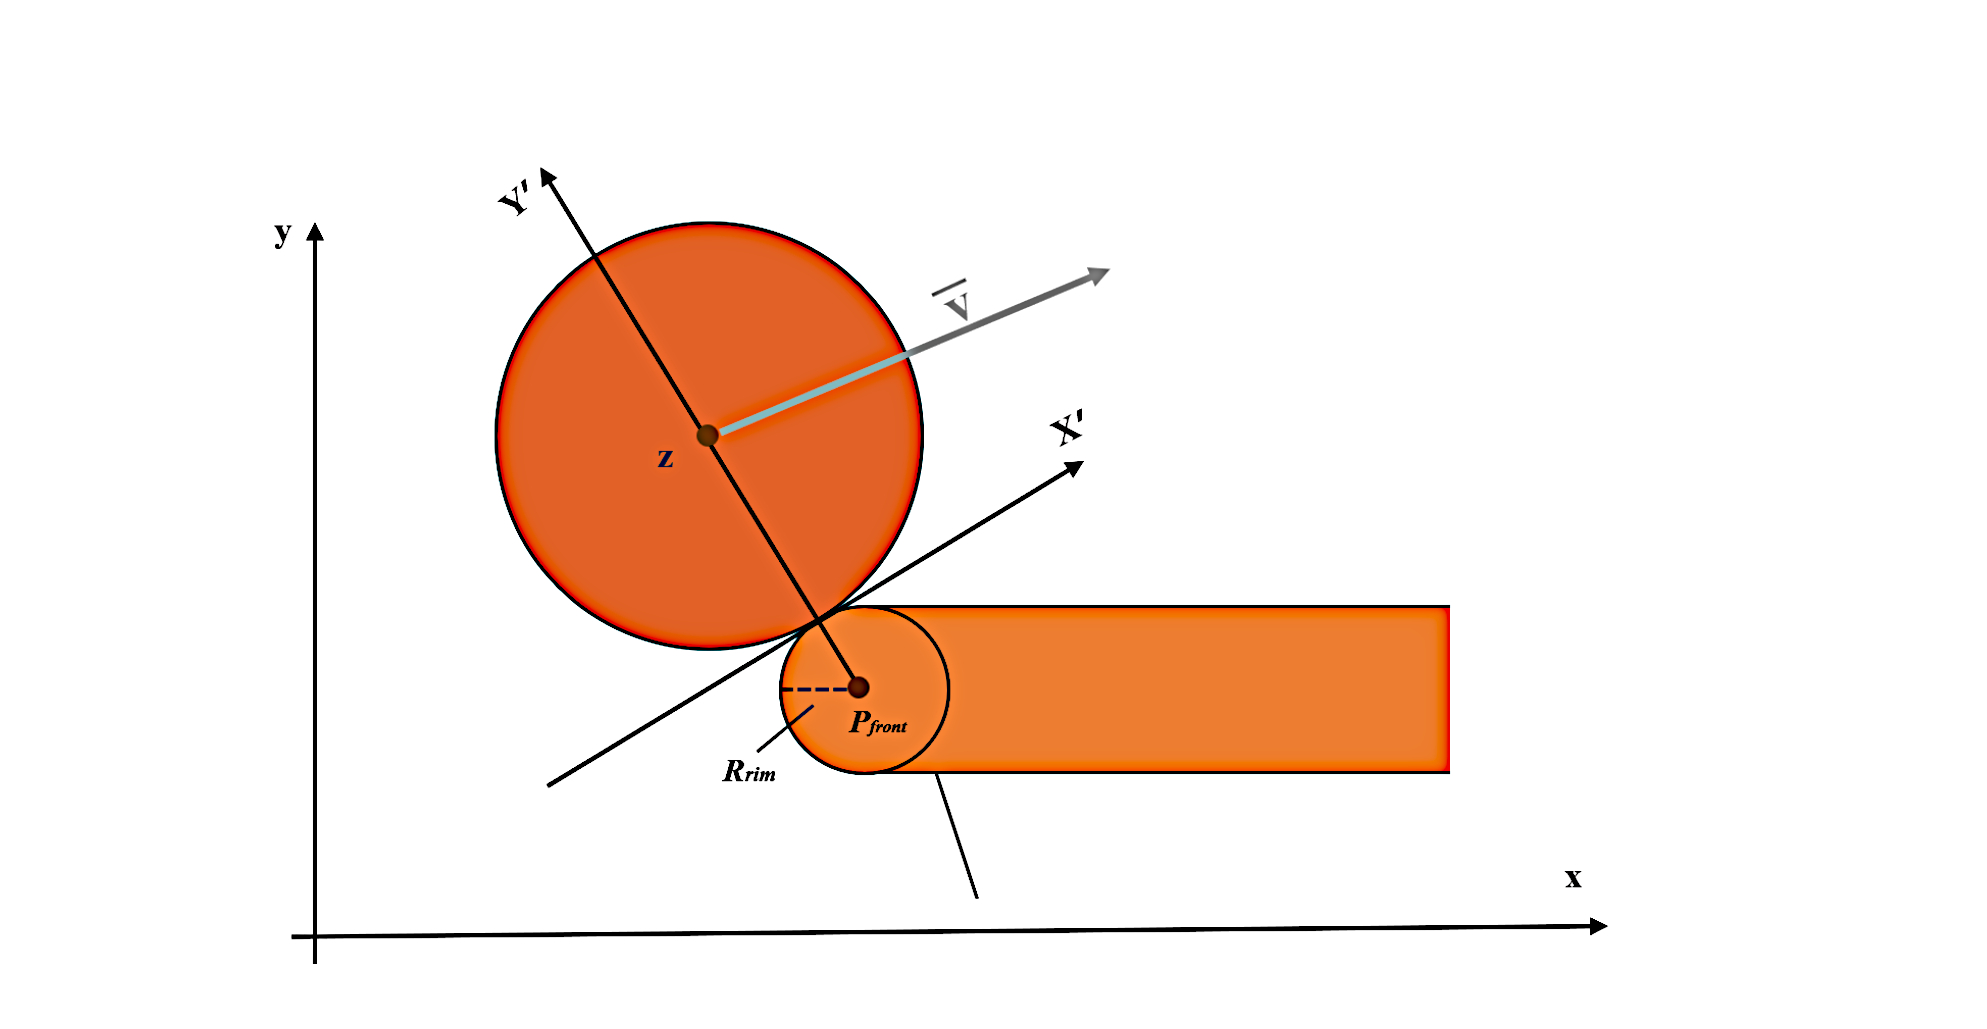

$$\text{Rysunek 2.}$$

<span style='font-size:larger;font-family:"Didot"'>

Z racji, że mówimy o obrocie, będziemy reprezentować punkty poprzez liczby zespolone. Niech w momencie styku środek piłki będzie opisany przez punkt $z = x+iy$, a wektor prędkości w momencie styku ma współrzędne $\vec{v}=\dot{x}\hat{\imath} + \dot{y}\hat{\jmath}$. Bez utraty ogólności przyjmijmy, że środek obręczy (przedni lub tylny) znajduje się w punkcie $z_0=x_{\operatorname{rim}}+iy_{\operatorname{rim}}$. Oznaczmy przez $\phi$ kąt obrotu nowego układu współrzędnych. Wtedy
    
$$\phi = \operatorname{arg}{\left(z-z_0\right)} - \frac{\pi}{2} = \operatorname{arg}{\left(i\left(z_0-z\right)\right)}.$$

In [14]:
ϕ(x::Real, y::Real, front::Bool)::Real = front ? angle(im * (complex(x_rim_front, y_rim) - complex(x, y))) :
                                                 angle(im * (complex(x_rim_back, y_rim) - complex(x, y)))

ϕ (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>

Teraz możemy wykorzystać uzyskany kąt do zbudowania macierzy obrotu i transformacji wektora $\vec{v}$ do nowej bazy. Niech
    
$$A = \begin{bmatrix}\cos{\phi}&-\sin{\phi}\\\sin{\phi}&\phantom{-}\cos{\phi}\end{bmatrix}$$ 
    
oznacza naszą macierz obrotu. Wtedy wektor $\vec{v}$ zostanie przetransformowany do nowej bazy, korzystając ze wzoru

$$\vec{v}' = A^{-1}\cdot\vec{v} = \dot{x}'\hat{\imath}'+\dot{y}'\hat{\jmath}'.$$

In [15]:
function v′(v::AbstractArray, ϕ::Real)::AbstractArray
    A = inv([cos(ϕ) -sin(ϕ);
             sin(ϕ) cos(ϕ)])
    return A * v
end

v′ (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>
Gdy mamy już nowy układ współrzędnych, przy oznaczeniu odległości środka piłki od środka obręczy (przedniej lub tylnej części) 
    
$$d=\sqrt{(x-x_{\operatorname{rim}})^2+(y-y_{\operatorname{rim}})^2}$$
    
możemy w podobny sposób zastosować równanie oscylatora harmonicznego i otrzymać następujące równania na siły reakcji i tarcia
    
$$\vec{N_{\operatorname{rim}}}=\left(kd+c\dot{y}'\right)\hat{\jmath}'$$
    
$$\vec{F_{T_{\operatorname{rim}}}}=-\mu_{\operatorname{rim}}\operatorname{sgn}{\left(\dot{x}'\right)}\left\lVert\vec{N_{\operatorname{rim}}}\right\rVert\hat{\imath}'$$
    

In [82]:
N_rim(x::Real, y::Real, ẏ′::Real, front::Bool)::Real = front ? 
    (k * sqrt((x - x_rim_front)^2 + (y - y_rim)^2) + c * ẏ′) : 
    (k * sqrt((x - x_rim_back)^2 + (y - y_rim)^2) + c * ẏ′)

N_rim (generic function with 1 method)

In [81]:
F_T_rim(x::Real, ẋ′::Real, y::Real, ẏ′::Real, front::Bool)::Real = 
    -μ_rim * sign(ẋ′) * abs(N_rim(x, y, ẏ′, front)) 

F_T_rim (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>
Podobnie otrzymujemy równanie na moment siły
$$\left\lVert\vec{M_{\operatorname{rim}}}\right\rVert=I\dot{\omega}=\left(R+R_{\operatorname{rim}}-d\right)\left(\vec{F_{T_{\operatorname{rim}}}}\cdot\hat{\imath}'\right).$$

In [18]:
M_rim(x::Real, ẋ′::Real, y::Real, ẏ′::Real, front::Bool)::Real = front ? 
    (R + R_rim - sqrt((x - x_rim_front)^2 + (y - y_rim)^2)) * F_T_rim(x, ẋ′, y, ẏ′, front) :
    (R + R_rim - sqrt((x - x_rim_back)^2 + (y - y_rim)^2)) * F_T_rim(x, ẋ′, y, ẏ′, front)

M_rim (generic function with 1 method)

---
### $\text{5.4 Algorytm}$ 

___

<span style='font-size:larger;font-family:"Didot"'>

<span style='font-size:larger;font-family:"Didot"'>
    
* Będziemy z każdym krokiem sprawdzali, czy wystąpiła kolizja z tablicą lub obręczą (przodem lub tyłem).
* Jeżeli wystąpi kolizja z tablicą, dodamy jedynie nowe siły do naszego układu równań
* Jeżeli natomiast wystąpi kolizja z obręczą, to przy wyliczaniu wartości w kolejnych krokach, będziemy postępowali według następującego algorytmu:
    
    1. Oblicz składowe dla rozważanych przed kolizjami sił
    2. Znajdź współrzędne wektora prędkości w bazie, odpowiadającej obrotowi o kąt $\phi$
    3. Oblicz przy pomocy nowego wektora prędkości składowe sił reakcji i tarcia
    4. Znajdź współrzędne tych sił w bazie standardowej, poprzez obrót o kąt $-\phi$
    5. Dodaj składowe wszystkich sił (teraz wszystkie odpowiadają bazie standardowej)

In [19]:
function F(t::Real, u::AbstractArray)::AbstractArray
    x₁, x₂, y₁, y₂, ω = u
    if backboard_collision(x₁, y₁)
        return [x₂,
                (N_board(x₁, x₂) + F_x(x₂, y₂, ω)) / m,
                y₂,
                (F_T_board(x₁, x₂, y₂) + F_y(x₂, y₂, ω)) / m,
                M_board(x₁, x₂, y₂) / I]
    elseif rim_collision(x₁, y₁, true)
        f_x, f_y = F_x(x₂, y₂, ω), F_y(x₂, y₂, ω)
        x₂, y₂ = v′([x₂, y₂], ϕ(x₁, y₁, true))
        n = N_rim(x₁, y₁, y₂, true)
        f_T = F_T_rim(x₁, x₂, y₁, y₂, true)
        torque = M_rim(x₁, x₂, y₁, y₂, true)
        f_T, n = v′([f_T, n], -ϕ(x₁, y₁, true))
        x₂, y₂ = v′([x₂, y₂], -ϕ(x₁, y₁, true)) 
        return [x₂,
                (f_T + f_x) / m,
                y₂,
                (n + f_y) / m,
                torque / I]
    elseif rim_collision(x₁, y₁, false)
        f_x, f_y = F_x(x₂, y₂, ω), F_y(x₂, y₂, ω)
        x₂, y₂ = v′([x₂, y₂], ϕ(x₁, y₁, false))
        n = N_rim(x₁, y₁, y₂, false)
        f_T = F_T_rim(x₁, x₂, y₁, y₂, false)
        torque = M_rim(x₁, x₂, y₁, y₂, false)
        f_T, n = v′([f_T, n], -ϕ(x₁, y₁, false))
        x₂, y₂ = v′([x₂, y₂], -ϕ(x₁, y₁, false)) 
        return [x₂,
                (f_T + f_x) / m,
                y₂,
                (n + f_y) / m,
                torque / I]
    else
        return [x₂,
                F_x(x₂, y₂, ω) / m,
                y₂,
                F_y(x₂, y₂, ω) / m,
                0]
    end
end

F (generic function with 1 method)

## $\text{6. Wizualizacja}$ 

___


<span style='font-size:larger;font-family:"Didot"'>
Zdefiniujmy kilka funkcji przydatnych do wizualizacji trajektorii lotu piłki.

In [20]:
import Plots
using IJulia

In [21]:
rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])

function visualize_throw(sol::AbstractArray)
    
    Plots.plot( # trajectory
        sol[:, 1], 
        sol[:, 3], 
        xlims=[0, x_board + 0.1], 
        ylims=[0, max(sol[:, 3]..., y_board + h)], 
        linestyle=:dash, 
        legend = :none,
        color=:royalblue1
        )
    
    Plots.plot!( # rim
        rectangle(4R_rim + 2R_hoop, 2R_rim,
        free_throw_line_x, y_rim - R_rim), 
        opacity=.7, 
        color= :orangered1
        )
    
    Plots.plot!( # pole
        rectangle(0.1, y_board, x_board, 0), 
        opacity=.5, 
        color=:grey
        )
    
    Plots.plot!( # net
        Shape([x_rim_front, x_rim_back, x_rim_front + 0.45, x_rim_back - 0.45], 
                [y_rim, y_rim, y_rim - 0.5, y_rim - 0.5]), 
        color=:white, 
        opacity = .3, 
        aspect_ratio=:equal
        )   
    
    Plots.plot!( # board
        rectangle(0.01, h,
        x_board, y_board), 
        color= :black
        )
    
end

visualize_throw (generic function with 1 method)

In [22]:
function animate_throw(t::Real, v₀::Real, θ₀::Real, ω::Real)
    rθ₀ = θ₀ / 180 * π
    x₀ = 0
    u₀ = [x₀, v₀ * cos(rθ₀), h₀, v₀ * sin(rθ₀), ω]
    tspan = LinRange(0, t, t * 1000 + 1)
    sol = runge_kutta(F, tspan, u₀)
    simulation = @animate for i ∈ 1:(t*1000 + 1)
                    visualize_throw(sol)
                    Plots.scatter!([sol[i, 1]], 
                             [sol[i, 3]], 
                             markersize=10, 
                             label="", 
                             color=:darkorange1
                            )
                 end every 25
    return gif(simulation, "simulation.gif", fps = 40)
end

LoadError: UndefVarError: @animate not defined

## $\text{7. Symulacja}$ 

___

<span style='text-align:justify;font-size:larger;font-family:"Didot"'>
W celu wyznaczenia zbioru kątów oraz prędkości początkowych, dla których rzut jest celny, przeprowadzimy symulację. W tym celu zdefiniujmy warunek "trafienia" piłki do kosza. Niech punkt $\, O = (x_O, y_O) \,$ będzie punktem środka obręczy, a punkt $\, P = (x_P, y_P) \,$ stanowi środek rzucanej piłki. Przez $\, D_O \,$ oznaczmy średnicę obręczy, przez $\, D_P \,$ średnicę przekroju poprzecznego piłki, a przez $\, h_O \,$ wysokość na jakieś zawieszona jest obręcz.
    
Ustalamy, że "trafienie" następuje wtedy, gdy $\, x_P \in \left[x_O - \varepsilon, \, x_O + \varepsilon \right] \,$ oraz $\,y_P \in \left[ h_O - \tfrac{D_P}{4}, \, h_O\right] \,$, gdzie $ \, \varepsilon = \tfrac{D_O - D_P}{2}\, $.

In [23]:
function scored(sol)
    before = false
    for point in zip(sol[:, 1], sol[:, 3])
        x, y = point[1], point[2]
        if before && (y < y_rim)
            return true
        elseif (x - R >= x_rim_front + R_rim) && (x + R <= x_rim_back - R_rim) && (y >= y_rim)
            before = true
        else
            before = false
        end
    end
    return false
    end    

scored (generic function with 1 method)

<span style='font-size:larger;font-family:"Didot"'>    
Mając tak zdefiniowany warunek, możemy przeprowadzić symulację dla kilku tysięcy trajektorii określonych różnymi prędkościami początkowymi i kątami wyrzutu piłki. 
             

In [24]:
function throws_simulation(v_min, v_max, θ_min, θ_max, points, time; collisions=true, ω₀ = 4π)
    
    good_v₀s = Array{Float64,1}()
    good_θ₀s = Array{Float64,1}()
    
    v₀s   = LinRange(v_min, v_max, Int(floor(sqrt(points))))
    θ₀s   = LinRange(θ_min, θ_max, Int(floor(sqrt(points)))) ./ 180 .* π
    tspan = LinRange(0, time, time*1000 + 1)
    
    for θ₀ in θ₀s
        for v₀ in v₀s 
            u₀ = [0; v₀ * cos(θ₀); h₀; v₀ * sin(θ₀); ω₀]
            sol = runge_kutta(F, tspan, u₀)
            if scored(sol)
                push!(good_v₀s, v₀)
                push!(good_θ₀s, θ₀)
            end
        end
    end
    return good_v₀s, good_θ₀s ./ π .* 180
end

throws_simulation (generic function with 1 method)

In [43]:
shoots = throws_simulation(5, 10, 30, 80, 10000, 3)

([9.94949494949495, 9.848484848484848, 9.848484848484848, 9.595959595959595, 9.696969696969697, 9.747474747474747, 9.595959595959595, 9.646464646464645, 9.494949494949495, 9.545454545454545  …  9.747474747474747, 9.797979797979798, 9.848484848484848, 9.898989898989898, 9.94949494949495, 10.0, 9.898989898989898, 9.94949494949495, 10.0, 10.0], [31.010101010101014, 31.515151515151512, 32.020202020202014, 32.52525252525252, 32.52525252525252, 32.52525252525252, 33.03030303030303, 33.03030303030303, 33.53535353535353, 33.53535353535353  …  70.4040404040404, 70.4040404040404, 70.4040404040404, 70.4040404040404, 70.4040404040404, 70.4040404040404, 70.9090909090909, 70.9090909090909, 70.9090909090909, 71.41414141414141])

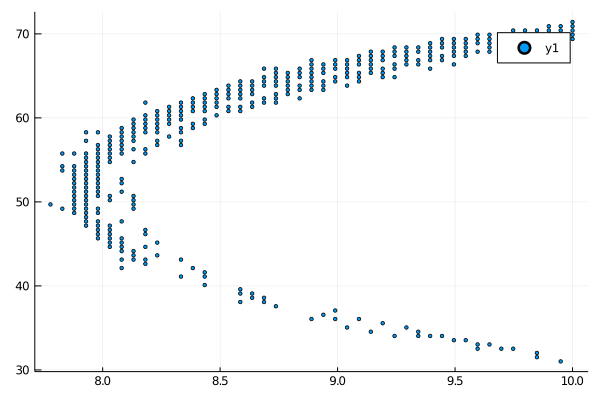

In [45]:
Plots.scatter(shoots[1], shoots[2], markersize=2)

In [25]:
function throws_simulation2(v_min, v_max, ω_min, ω_max, points, time; θ = π / 4, collisions=true)
    
    good_v₀s = Array{Float64,1}()
    good_ω₀s = Array{Float64,1}()
    
    v₀s   = LinRange(v_min, v_max, Int(floor(sqrt(points))))
    ω₀s   = LinRange(ω_min, ω_max, Int(floor(sqrt(points))))
    tspan = LinRange(0, time, time * 1000 + 1)

    for ω₀ in ω₀s
        for v₀ in v₀s
            u₀ = [0, v₀ * cos(θ), h₀, v₀ * sin(θ), ω₀]
            sol = runge_kutta(F, tspan, u₀)
            if scored(sol)
                push!(good_v₀s, v₀)
                push!(good_ω₀s, ω₀)
            end
        end
    end
    return good_v₀s, good_ω₀s
end

throws_simulation2 (generic function with 1 method)

In [ ]:
shoots = throws_simulation2(6, 9, 0, 20, 10000, 3)

In [ ]:
Plots.scatter(shoots[1], shoots[2], markersize=2)

___
### $$\scriptstyle \text{BIBLIOGRAFIA}$$ <a id='references'></a>

___

<span style='font-size:larger;font-family:"Didot"'>  
    
[[1]](https://www.espn.com/nba/stats/team/_/table/offensive/sort/avgFreeThrowsMade/dir/desc) https://www.espn.com/nba/stats/team/_/table/offensive/sort/avgFreeThrowsMade/dir/desc
    
[[2]](https://www.inpredictable.com/2016/03/free-throw-deep-dives-launch-angle.html) https://www.inpredictable.com/2016/03/free-throw-deep-dives-launch-angle.html 
    
[[3]](https://www.grc.nasa.gov/www/k-12/airplane/soclift.html) https://www.grc.nasa.gov/www/k-12/airplane/soclift.html  
    
[[4]](https://iopscience.iop.org/article/10.1088/1367-2630/16/3/033039/pdf) $\scriptsize \text{B. D. TEXIER,  C. COHEN,  G. DUPEUX,  D. QUÉRÉ,  C. CLANET,} \;\textit{On the size of sportsfields,} \; \text{New Journal  of  Physics 16 (2014), p.3}$    
    
[[5]](https://core.ac.uk/download/pdf/81927888.pdf) $\scriptsize \text{H. OKUBO,  M. HUBBARD,} \;\textit{Identification of basketball parameters for a simulation model ,} \; \text{Procedia Engineering 2 (2010) pp. 3281–3286}$
    
[[6]](https://pdfs.semanticscholar.org/1a2d/135a3f8af5e067b6c965859bdae1d5af7427.pdf) $\scriptsize \text{J. M. GABLONSKY,  A. LANG,} \;\textit{Modeling Basketball Free Throws,} \; \text{SIAM Review vol. 47, No. 4 (2014), pp. 775-798}$
    
[[7]](https://indico.cern.ch/event/163205/contributions/1413227/attachments/192775/270516/Team351.pdf) https://indico.cern.ch/event/163205/contributions/1413227/attachments/192775/270516/Team351.pdf
    
[[8]](https://www.researchgate.net/publication/245372854_Numerical_Analysis_of_the_Basketball_Shot) $\scriptsize \text{L. SILVERBERG,  C. TRAN, K. ADCOCK,} \;\textit{Numerical Analysis of the Basketball Shot ,} \; \text{Journal of Dynamic Systems Measurement and Control 125(4) (December 2003) pp. 531-540}$

___  